# End-to-End Machine Learning Project

Here are the main steps we will go througt
1. Look at the big picture
2. Get the data
3. Discover and visualize the data to gain insights
4. Prepare the data for Machine Learning Algorithms
5. Select a model and train it
6. Fine-tune your model
7. Present your solution
8. Launch monitor and maintain your solution

## California Housing Prices

The task is to build a model of housing prices in the state. This data includes metrics such as the  population, median income and median housing price for each block group in California

In [2]:
# A sequence of data processing components is called a data pipeline. They help in lot of data manipulation and many data transformations to apply

In [3]:
# Frame the problem
# Predict the median housing price.
# supervised linear regression problem

# Select a performance Measure
# typical measure for regression problem is Root mean square Error (RMSE)

In [4]:
# fetch the data
import os
import tarfile
import urllib

DOWNLOADING_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("./datasets","housing")
HOUSING_URL = DOWNLOADING_ROOT + "datasets/housing/housing.tgz"

In [5]:
# download housing dataset
def fetch_housing_dataset(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    os.makedirs(housing_path, exist_ok=True)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [6]:
import pandas as pd
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path,"housing.csv")
    return pd.read_csv(csv_path)

In [7]:
fetch_housing_dataset()
housing = load_housing_data()

In [8]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [9]:
housing.info() # this method will give quick description of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [10]:
# we can see that the colum total_bedrooms has only 20433 non-null values. We will need to take card of this later

In [11]:
# let's check different types of values for ocean_proxmity
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [12]:
# let's look ath the other fields. The describe() methods shows a summary of the numerical attributes

In [13]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [14]:
# another quick way to get feel of the type of data we are dealing with is to plot a histogram for each numerical attributes.

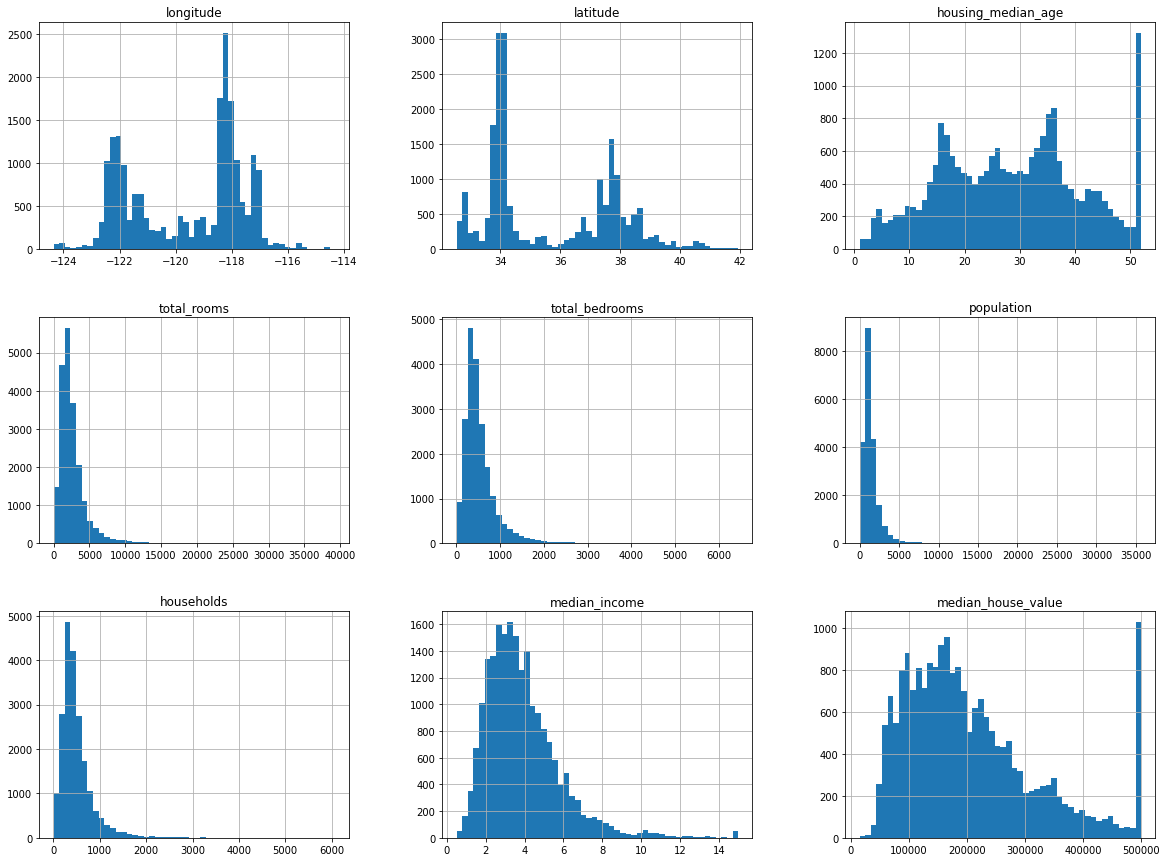

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()

In [16]:
# analysis
# looks like housing median age and median housing value has few outliers at the right end.
# the median income doesn't look like expressed in US Dollars. 
# The data bas been scaled and capped at 15. The number roughly represents tens of thousands of dollars

#### Create a training set

In [17]:
import numpy as np
def split_train_sets(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data)) # create a permutation of indices from 0 to len(data)
    print(shuffled_indices) # prints these indices in permutations
    test_set_size = int(len(data) * test_ratio) # get test_set size
    test_indices = shuffled_indices[:test_set_size] # get's test_set_size shuffled indices 
    train_indices = shuffled_indices[test_set_size:] # the rest indices are training indices
    print(test_indices, train_indices)
    return data.iloc[train_indices], data.iloc[test_indices] # get's the record with those indices

train_set, test_set = split_train_sets(housing, 0.2)
len(train_set), len(test_set)

[15122  8943  2359 ...   525 12925  8418]
[15122  8943  2359 ... 14385  4476 17595] [11107 15117 16061 ...   525 12925  8418]


(16512, 4128)

In [18]:
# scikit learn provides a few functions to split datasets into multiple subsets.
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state = 42)

In [19]:
# let's bin the housing income into category

housing["income_cat"] = pd.cut(housing["median_income"], bins=[0., 1.5, 3., 4.5, 6., np.inf], labels=[1,2,3,4,5])

<AxesSubplot:>

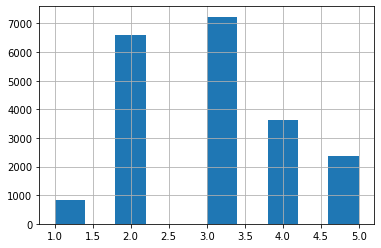

In [20]:
housing["income_cat"].hist()

In [21]:
# now we are ready to do stratified sampling based on the income category.
from sklearn.model_selection import StratifiedShuffleSplit

In [22]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [23]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64

In [24]:
# removing the income_cat attributes so the daa is back to it's original state
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

#### Discover and visualize the Data to Gain Insights

In [25]:
housing = strat_train_set.copy()

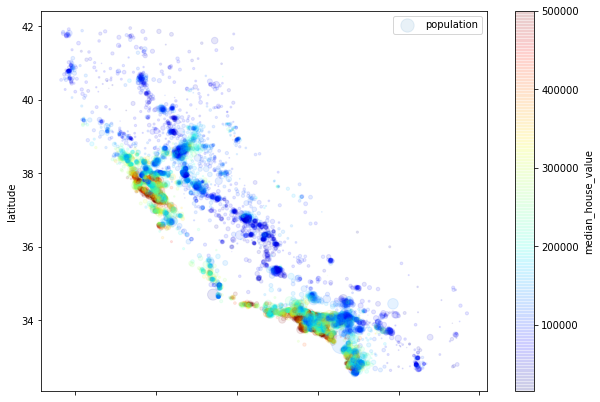

In [26]:
# visualize geographical data
# we can clearly see high density population now with alpha setting
# the radius of each circle represents the district population(option s)
# and color represents the price (option c)
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.1, 
            s=housing["population"]/100, label='population', figsize=(10,7),
            c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True)
plt.show()

In [27]:
# looking for correlations
corr_matrix = housing.corr()

In [28]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

**the correlation coefficient ranges from -1 to +1. When it's close to 1, it means that there is strong positive correlation. When it's close to  -1, that means there is strong negative correlation. Finally coefficients close 0 mean that there is no linear correlation**

![correlation-graphs](../images/01-correlation-graph.png)


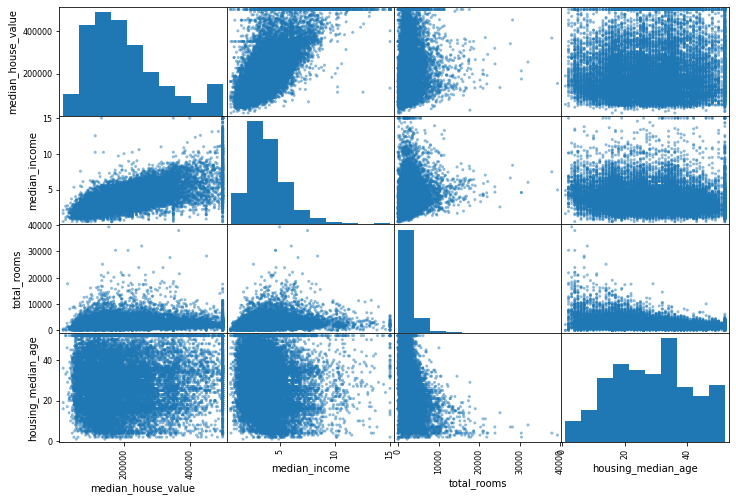

In [29]:
# another way to checkfor correlation between attributes is to suse the pandas scatter_matrix() function, 
# which pots every numerical attribute against every other numerical attribute

from pandas.plotting import scatter_matrix
attributes=["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12,8))
plt.show()

In [30]:
# the main diagonal would be full of straight lines if pandas plotted each variable against itself, which would not be very usefult.
# so instead pandas displays a histogram of each attribute

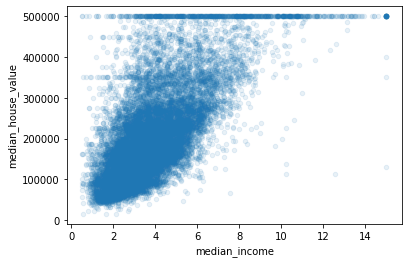

In [31]:
housing.plot(kind="scatter", x="median_income", y="median_house_value",alpha=0.1)
plt.show()

In [32]:
# first we can see here is the correlation is very strong. we can clearly see the upward trend. and the point is not too dispersed.
# second we can see the price cap clearly visible as a horizontal line at $500000

#### Experimenting with attribute comibinations Feature Engineering

In [33]:
# feature engineering gives more clear information and better model predictions
# total number of rooms in a district is not very useful if you don't know how many households are there.
# what we really want is number of rooms per household
# similarly total number of bedrooms is not very useful
# but bedrooms per total rooms is useful

In [34]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"] = housing["population"]/housing["households"]

In [35]:
# let's look at the correlation matrxi again
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

In [36]:
# bedrooms_per_room is much more correlated that total_bedrooms and rooms

#### prepare the data for machine learning algorithms

In [37]:
# let's revert to a clean training set.
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

#### Data Cleaning

In [38]:
# we have three options to clean our data
# dropna(), drop(), fillna() methods

# housing.dropna(subset=["total_bedrooms"]) # option 1
# housing.drop("total_bedrooms", axis=1) # option 2
# median=housing["total_bedrooms"].median() # option 3
# housing["total_bedrooms"].fillna(median, inplace=True) # option 4

In [39]:
# scikit-learn provides a handy class to take care of missing values
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy="median")

In [40]:
# since the median can only be calculated on numerical attributes, we need to create a copy of the data without the text attribute
housing_num = housing.drop("ocean_proximity", axis=1)

In [41]:
# now we can fit the imputer instance with the training set
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [42]:
# the imputer has simply computer the median of each attributes and stored in the results statistics_ instance variable.
# only the total_bedrooms attribute had missing values
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [43]:
# now we can use this trained imputer to transform this training_set by replacing missing values with the learned medians
X = imputer.transform(housing_num)

In [44]:
# the result is plain numpy. Let's convert it to back to dataframe

In [45]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns, index=housing_num.index)

#### handling text and categorical attributes

In [46]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(10)

,ocean_proximity
17606,<1H OCEAN
18632,<1H OCEAN
14650,NEAR OCEAN
3230,INLAND
3555,<1H OCEAN
19480,INLAND
8879,<1H OCEAN
13685,INLAND
4937,<1H OCEAN
4861,<1H OCEAN


In [47]:
# let's convert these categorical text to numbers
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10] # show 10 records

array([[0.],
       [0.],
       [4.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.]])

In [48]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [49]:
# we will create one binary attribute per category. this is called one hot encoder.
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [50]:
# we can see that the output is sparse matrix. After one-hot encoding we get a matrix with thousands of columns. to convert it into dense, we call toarray() methods

In [51]:
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [52]:
cat_encoder.categories_ # to see the list of categories

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

#### Custom Transformers

In [53]:
# we can create our own custom transformers using base class TransformerMixin and BaseEstimator

In [54]:
from sklearn.base import BaseEstimator, TransformerMixin

room_ix, bedrooms_ix, population_ix, households_ix = 3,4,5,6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True): # no *args or **kargs
        self.add_bedrooms_per_room=add_bedrooms_per_room
    
    def fit(self, X, y=None):
        return self # nothing to do
    
    def transform(self, X, y=None):
        # feature engineering
        rooms_per_household=X[:,room_ix]/X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:,households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix]/X[:, room_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

#### Feature Scaling

There are two common ways to get all attributes to have the same scale

**minmax scaling (normalization)**

- values are shifted and rescaled so that they end up ranging from 0 to 1. 
- *x = (x-min)/(max-min)*

**standardization**

- values are shifted and rescaled so that they end up ranging from mean of the data to standard deviation.
- Standardization is less affected by outliers
- *x = (x - mean)/standard_deviation*





#### transfomer pipelines

In [55]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline({
    ('imputer', SimpleImputer(strategy="median")),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler',StandardScaler())
})

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [56]:
# this pipeline constructor teask a list of name/estimator pairs defining a sequence of steps.  
# All but the last estimator must be transformers. they must have fit_transform() method
# so far we have handled the categorical and numerical colums separately.
# Scikit learn has column transformer for this purpose to handle together

In [66]:
from sklearn.compose import ColumnTransformer
num_attribs = list(housing_num) # gets the columns
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs)
])

housing_prepared = full_pipeline.fit_transform(housing)

#### Select and train a model

In [67]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [68]:
# let's try it out on a few instances

some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_processed = full_pipeline.transform(some_data)
print("Predictions", lin_reg.predict(some_data_processed))

Predictions [210644.60459286 317768.80697211 210956.43331178  59218.98886849
 189747.55849879]


In [69]:
print("Labels", list(some_labels))

Labels [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


In [70]:
# it works, although the predictions are not exactly the same
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_mse, lin_rmse

(4709829587.97112, 68628.19819848922)

In [71]:
# let's train a decision tree

In [72]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor()

In [73]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_mse, tree_rmse

(0.0, 0.0)

In [74]:
# this looks there is no error at all. This could be because of overfitting.

#### better evaluation using cross validation

In [76]:
# we should use scikit learns cross validations
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)
print(tree_rmse_scores)

[69105.89587783 66640.44542731 71909.89366941 68579.11125452
 71332.04281447 74307.41623643 70970.43456846 72131.7436439
 78385.07375728 68603.98205385]


In [78]:
def display_scores(scores):
    print("Score", scores)
    print("Mean", scores.mean())
    print("standard deviation", scores.std())

In [79]:
display_scores(tree_rmse_scores)

Score [69105.89587783 66640.44542731 71909.89366941 68579.11125452
 71332.04281447 74307.41623643 70970.43456846 72131.7436439
 78385.07375728 68603.98205385]
Mean 71196.60393034652
standard deviation 3186.0102484430363


In [83]:
# let's compute cross validation score for linear regressor
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
lin_rmse_score = np.sqrt(-lin_scores)
display_scores(lin_rmse_score)

Score [66782.73843989 66960.118071   70347.95244419 74739.57052552
 68031.13388938 71193.84183426 64969.63056405 68281.61137997
 71552.91566558 67665.10082067]
Mean 69052.46136345083
standard deviation 2731.674001798348


In [84]:
# let's try out one more model Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
forest_rmse = np.sqrt(-forest_scores)
display_scores(forest_rmse)

Score [49885.94773958 47359.02086526 49903.26599802 52306.72199611
 49769.1136896  53477.53051964 48819.11148795 48013.31439202
 52945.3666709  50054.0152588 ]
Mean 50253.34086178775
standard deviation 1945.3106045214925


In [85]:
# looks like the random forest regressor did much better than linear regressor and decision tree

#### Saving and loading the model

In [86]:
import joblib
joblib.dump(forest_reg, "../models/01-forest-reg-model.pkl")

['./models/01-forest-reg-model.pkl']

In [1]:
model = joblib.load("../models/01-forest-reg-model.pkl")

NameError: name 'joblib' is not defined

#### Fine tune your model

In [89]:
# Grid search
# this function is used to fiddle with hyperparameter

In [91]:
from sklearn.model_selection import GridSearchCV
param_grid = [
    {'n_estimators': [3,10,30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap':[False], 'n_estimators':[3,10], 'max_features':[2, 3, 4]}
]
forest_reg = RandomForestRegressor()

In [92]:
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)

In [93]:
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [94]:
# grid search wil tell scikit-learn to first evaluate 3 X 4 = 12 combinations
# and they try 2 X 3 = 6 combinations with bootstrap False

In [95]:
grid_search.best_params_ # gives the best result

{'max_features': 8, 'n_estimators': 30}

In [96]:
# we can also get the best estimator directly
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30)

In [97]:
# if grid search is initialized with refit = True, then once it finds the best estimator using cross validation, it retrains it on the whole training set

In [99]:
# and of course the evaluation scores are also availables
cvres = grid_search.cv_results_
for mean_square,params in zip(cvres["mean_test_score"],cvres["params"]):
    print(np.sqrt(-mean_square), params)

63542.5124396601 {'max_features': 2, 'n_estimators': 3}
55609.22122599912 {'max_features': 2, 'n_estimators': 10}
53021.66025616197 {'max_features': 2, 'n_estimators': 30}
60683.46458788942 {'max_features': 4, 'n_estimators': 3}
52898.60651573446 {'max_features': 4, 'n_estimators': 10}
50579.552500756145 {'max_features': 4, 'n_estimators': 30}
59792.137596952336 {'max_features': 6, 'n_estimators': 3}
52014.99617231137 {'max_features': 6, 'n_estimators': 10}
50178.594556944656 {'max_features': 6, 'n_estimators': 30}
58494.11454099663 {'max_features': 8, 'n_estimators': 3}
52025.774685795484 {'max_features': 8, 'n_estimators': 10}
50166.98377136098 {'max_features': 8, 'n_estimators': 30}
62088.344362471595 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
53857.40421948836 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
60472.469567580345 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
53109.05799151649 {'bootstrap': False, 'max_features': 3, 'n_estimators

In [100]:
# the grid search is fine when you are exploring relatively few combinations
# but when hyperparameter search space is large, it is often preferableto use randomsearchCV

#### analyze the best models and their errors

In [101]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([6.56072150e-02, 6.19233907e-02, 4.23388768e-02, 1.54421493e-02,
       1.43602956e-02, 1.49065356e-02, 1.41039891e-02, 3.86430443e-01,
       4.27069636e-02, 1.12401036e-01, 6.31789586e-02, 7.48319844e-03,
       1.52055684e-01, 1.00708543e-04, 3.41611811e-03, 3.54443753e-03])

In [103]:
# let's display these important scores next to their corresponding attributes
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_hhold"]
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.38643044311028035, 'median_income'),
 (0.15205568432510821, 'INLAND'),
 (0.1124010356002977, 'pop_per_hhold'),
 (0.06560721500095452, 'longitude'),
 (0.06317895856317039, 'bedrooms_per_hhold'),
 (0.06192339074112192, 'latitude'),
 (0.04270696363486431, 'rooms_per_hhold'),
 (0.04233887680004263, 'housing_median_age'),
 (0.015442149304902715, 'total_rooms'),
 (0.014906535586532769, 'population'),
 (0.014360295649932858, 'total_bedrooms'),
 (0.014103989052005482, 'households'),
 (0.0074831984443424655, '<1H OCEAN'),
 (0.003544437532622273, 'NEAR OCEAN'),
 (0.003416118111055601, 'NEAR BAY'),
 (0.00010070854276589923, 'ISLAND')]

#### Evaluate your system on the test system

In [104]:
final_model = grid_search.best_estimator_
X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)

final_predictions = final_model.predict(X_test_prepared)

In [105]:
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [106]:
print("final rmse", final_rmse)

final rmse 48157.19621627564
